### Assignment 3 DSC 478 Part 2

#### Kevin Thompson

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from numpy import dot
from numpy.linalg import norm
#cosine simularity function
def distCosine(vecA, vecB):
    cos_sim = dot(vecA, vecB)/(norm(vecA)*norm(vecB))
    cos_distance = 1-cos_sim
    return cos_distance

In [4]:
#import data

freq = pd.read_csv('C:/Users/kthom/Downloads/matrix.txt', sep=",", header=None)
terms = pd.read_csv('C:/Users/kthom/Downloads/terms.txt',sep=',',header = None)
classes = pd.read_csv('C:/Users/kthom/Downloads/classes.txt',sep=' ',header = None,names = ['document','class'],skiprows=[0])
        #the class is for the type of document

In [5]:
classes.shape

(2500, 2)

In [6]:
for i in (freq.isnull().sum()):
    if i != 0:
        print(i)
for i in (terms.isnull().sum()):
    if i != 0:
        print(i)
for i in (classes.isnull().sum()):
    if i != 0:
        print(i)
#no nulls

In [7]:
#combine the freq and terms
newRows = []
row_names_list = freq.index.tolist()
for i in terms[0]:
    newRows.append(i)
res = {row_names_list[i]: newRows[i] for i in range(len(row_names_list))}
freq.rename(index = res, inplace = True)
freq

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aargh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaronc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubov,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
freqT = freq.T
freqT.head()

,aa,aargh,aaron,aaronc,ab,abandon,abc,abid,abil,abl,...,zq,zr,zrb,zs,zu,zubov,zv,zw,zx,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


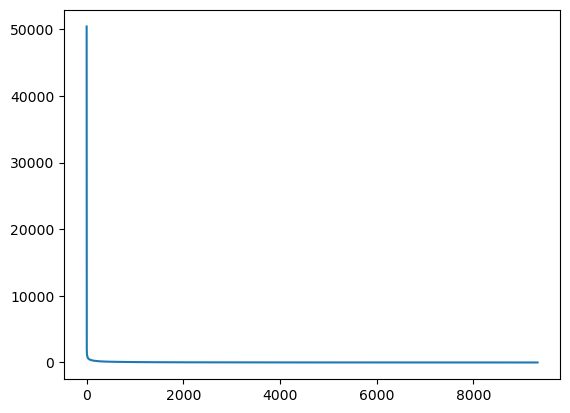

In [9]:
termFreqs = freqT.sum(axis = 0)
plt.plot(sorted(termFreqs, reverse = True)) #this will give us our distribution
plt.show()

This is a much more extreme shape than in the previous assignment, although in general it is the same pattern. 

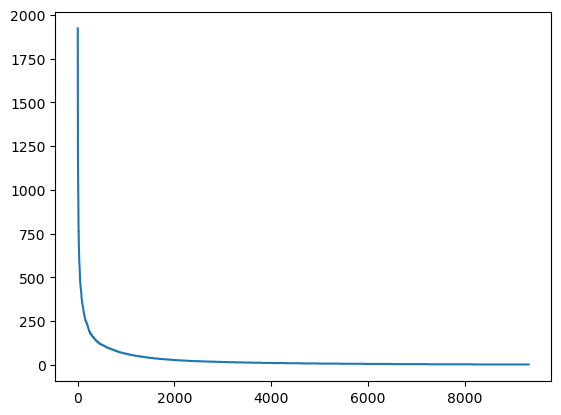

In [10]:
#just out of curiosity I want to make sure there's not an error and if we remove the first few words that are dominating, do we get a shape we are more used to
termFreqs = freqT.sum(axis = 0)
plt.plot(sorted(termFreqs, reverse = True)[3:]) #this will give us our distribution
plt.show()

This confirms the shape is fine, the most common terms just dominate the data.

In [11]:
'''
k Means Clustering for Ch10 of Machine Learning in Action
@author: Peter Harrington
'''
from numpy import *

def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)
def distCosine(vecA, vecB):
    cos_sim = dot(vecA, vecB)/(norm(vecA)*norm(vecB))
    cos_distance = 1-cos_sim
    return cos_distance
'''
randCent(), creates a set of k ran-dom  centroids  for  a  given  dataset.  
The  random  centroids  need  to  be  within  thebounds of the dataset. 
This is accomplished by finding the minimum and maximumvalues of each dimension 
in the dataset. 
Random values from 0 to 1.0 are then chosenand  scaled  by  the  range  and  
minimum  value  to  ensure  that  the  random  points  arewithin  the  bounds  
of  the  data.  
'''
def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

# kMeans function
def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = 2; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment


'''
To overcome the problem of poor clusters because of k-means getting caught in a local minimum, another algorithm has been developed. This algorithm, known as bisecting k-means, starts out with one cluster and then splits the cluster in two. It then chooses a cluster to split. The cluster to split is decided by minimizing the SSE. This splitting based on the SSE is repeated until the user-defined number of clusters is attained.
'''
def biKmeans(dataSet, k, distMeas=distEuclid):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1]) #compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0] #replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss #reassign new clusters, and SSE
    return mat(centList), clusterAssment



Try again with TD for TFIDF

In [14]:
freqNew = pd.read_csv('C:/Users/kthom/Downloads/matrix.txt', sep=",",header=None)
freqNew

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
newRows = []
row_names_list = freqNew.index.tolist()
for i in terms[0]:
    newRows.append(i)
res = {row_names_list[i]: newRows[i] for i in range(len(row_names_list))}
freqNew.rename(index = res, inplace = True)
freqNew

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aargh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaronc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubov,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zv,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
DT = freqNew.T
DT.head()

,aa,aargh,aaron,aaronc,ab,abandon,abc,abid,abil,abl,...,zq,zr,zrb,zs,zu,zubov,zv,zw,zx,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
numTerms = freqNew.shape[0]
NDocs = freqNew.shape[1]

In [23]:
dfreq = pd.DataFrame([(freqNew!=0).sum(1)]).T
dfreq

,0
aa,10
aargh,6
aaron,22
aaronc,9
ab,13
...,...
zubov,6
zv,5
zw,3
zx,3


In [25]:
NMatrix = np.ones(np.shape(freqNew),dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)
print(NMatrix.shape)

[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
(9328, 2500)


In [41]:
#freqNew[freqNew == 0] = 1#replace 0s with 1s

#I was multiplying by the data not by the pd.DataFrame([(freqNew!=0).sum(1)]).T. The variable names threw me off

IDF = np.log2(np.divide(NMatrix,np.array(dfreq)))
print(IDF)

[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]


In [42]:
TD_tfidf = freqNew*IDF

In [43]:
pd.set_option("display.precision",2)
TD_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
aa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aargh,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aaron,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aaronc,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ab,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
DT_tfidf = TD_tfidf.T
#I want to retain the document numbers associated to their rows for comparison purposes later
DT_tfidf.insert(0,'Doc Number', np.linspace(0,2499,2500,dtype = int))

DT_tfidf = np.array(DT_tfidf)

In [84]:
from sklearn.model_selection import train_test_split
DTX_train,DTX_test,DTy_train,DTy_test = train_test_split(DT_tfidf, classes['class'], test_size=.2, random_state=20)

In [46]:
"""DTX_trainNP = np.array(DTX_train)
DTX_testNP = np.array(DTX_test)
DTy_trainNP = np.array(DTy_train)
DTy_testNP = np.array(DTy_test)

DTX_trainNP"""

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:
print(DTX_train)
DTX_train.shape

[[2202.    0.    0. ...    0.    0.    0.]
 [ 766.    0.    0. ...    0.    0.    0.]
 [ 714.    0.    0. ...    0.    0.    0.]
 ...
 [1428.    0.    0. ...    0.    0.    0.]
 [2441.    0.    0. ...    0.    0.    0.]
 [ 271.    0.    0. ...    0.    0.    0.]]


(2000, 9329)

In [86]:
#preserve document labels
DTX_train_docLabels = DTX_train.T[0]
DTX_test_docLabels = DTX_test.T[0]

In [87]:
DTX_train = DTX_train.T[1:].T
DTX_test = DTX_test.T[1:].T

In [88]:
#check this was done correctly
print(DTX_train)
DTX_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(2000, 9328)

In [208]:
k = 6
centroids_tfidf, clusters_tfidf = kMeans(DTX_train,k,distMeas = distCosine,createCent= randCent)

In [209]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(centroids_tfidf,columns=terms)
centroids

,"(aa,)","(aargh,)","(aaron,)","(aaronc,)","(ab,)","(abandon,)","(abc,)","(abid,)","(abil,)","(abl,)",...,"(zq,)","(zr,)","(zrb,)","(zs,)","(zu,)","(zubov,)","(zv,)","(zw,)","(zx,)","(zz,)"
0,0.16,0.11,0.00,0.00,0.38,0.04,0.56,0.00,0.14,0.28,...,0.27,0.34,0.10,0.13,0.17,0.15,1.12,0.24,0.15,0.35
1,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.07,0.32,0.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,...,0.00,1.28,0.00,14.92,0.00,0.00,0.00,0.00,0.00,0.00
3,0.04,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.03,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.02,0.00,0.05,0.00,0.09,0.04,0.03,0.00,0.17,0.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,1.24,0.21,0.04,0.08,0.00,0.00,0.31,0.46,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [243]:
print(clusters_tfidf)

[[3.   0.83]
 [4.   0.62]
 [0.   0.69]
 ...
 [4.   0.74]
 [0.   0.84]
 [3.   0.47]]


In [244]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
for i in clusters_tfidf:
    if i[0] == 0:
        cluster0.append(i)
    elif i[0] == 1:
        cluster1.append(i)
    elif i[0] == 2:
        cluster2.append(i)
    elif i[0] == 3:
        cluster3.append(i)
    elif i[0] == 4:
        cluster4.append(i)
    elif i[0] == 5:
        cluster5.append(i)
    elif i[0] == 6:
        cluster6.append(i)
    elif i[0] == 7:
        cluster7.append(i)
print("cluster0: ",len(cluster0),"docs")
print("cluster1: ",len(cluster1),"docs")
print("cluster2: ",len(cluster2),"docs")
print("cluster3: ",len(cluster3),"docs")
print("cluster4: ",len(cluster4),"docs")
print("cluster5: ",len(cluster5),"docs")
print("cluster6: ",len(cluster6),"docs")
print("cluster7: ",len(cluster7),"docs")
clusters = [cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7]

cluster0:  401 docs
cluster1:  393 docs
cluster2:  7 docs
cluster3:  381 docs
cluster4:  423 docs
cluster5:  395 docs
cluster6:  0 docs
cluster7:  0 docs


Running this for multiple K values, I've noticed that once you get past 6 clusters, the last two clusters aren't really being used at all. More often than not they have almost nothing in their clusters. It seems that they want to be assigne to 6 clusters. 

In [258]:
cluster0Terms = {}
cluster1Terms = {}
cluster2Terms = {}
cluster3Terms = {}
cluster4Terms = {}
cluster5Terms = {}
cluster6Terms = {}
cluster7Terms = {}

In [259]:
for i in range(len(clusters_tfidf)): #iterate through the cluster assignments per document
    if (clusters_tfidf[i][0]) == 0.0: # if document is assigned to cluster 0
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster0Terms.keys(): # if this term has already been seen in a document assigned to this cluster, add 1 to the value
                cluster0Terms[term] += 1
            else: # if the term hasn't been seen before, add it with 1 
                cluster0Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 1.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster1Terms.keys(): 
                cluster1Terms[term] += 1
            else:  
                cluster1Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 2.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster2Terms.keys(): 
                cluster2Terms[term] += 1
            else:  
                cluster2Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 3.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster3Terms.keys(): 
                cluster3Terms[term] += 1
            else:  
                cluster3Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 4.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster4Terms.keys(): 
                cluster4Terms[term] += 1
            else:  
                cluster4Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 5.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster5Terms.keys(): 
                cluster5Terms[term] += 1
            else:  
                cluster5Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 6.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster6Terms.keys(): 
                cluster6Terms[term] += 1
            else:  
                cluster6Terms[term] = 1
                
    elif (clusters_tfidf[i][0]) == 7.0: 
        for term in (list(freqNew[DTX_train_docLabels[i]].loc[freqNew[DTX_train_docLabels[i]]>0].index)): 
            if term in cluster7Terms.keys(): 
                cluster7Terms[term] += 1
            else:  
                cluster7Terms[term] = 1

In [260]:
cluster0TermsSorted = dict(sorted(cluster0Terms.items(), key=lambda item: item[1], reverse = True))
cluster1TermsSorted = dict(sorted(cluster1Terms.items(), key=lambda item: item[1], reverse = True))
cluster2TermsSorted = dict(sorted(cluster2Terms.items(), key=lambda item: item[1], reverse = True))
cluster3TermsSorted = dict(sorted(cluster3Terms.items(), key=lambda item: item[1], reverse = True))
cluster4TermsSorted = dict(sorted(cluster4Terms.items(), key=lambda item: item[1], reverse = True))
cluster5TermsSorted = dict(sorted(cluster5Terms.items(), key=lambda item: item[1], reverse = True))
cluster6TermsSorted = dict(sorted(cluster6Terms.items(), key=lambda item: item[1], reverse = True))
cluster7TermsSorted = dict(sorted(cluster7Terms.items(), key=lambda item: item[1], reverse = True))
clusterTermsSorted = cluster0TermsSorted,cluster1TermsSorted,cluster2TermsSorted,cluster3TermsSorted,cluster4TermsSorted,cluster5TermsSorted,cluster6TermsSorted,cluster7TermsSorted

In [305]:
def cluster_analysis(clusterTerms, clusters, k):
    for value in range(k):
        try:
            print('Cluster: ',value)
            print('Cluster Size: ',len((clusters[value])))
            print('Top 5 terms in Cluster',str(value)+':')    
            print('term:',list(clusterTerms[value].keys())[1]+',', 'DF:',str(list(clusterTerms[value].values())[1])+',', '% of Docs:',list(clusterTerms[value].values())[1]/len(clusters[value]))
            print('term:',list(clusterTerms[value].keys())[2]+',', 'DF:',str(list(clusterTerms[value].values())[2])+',', '% of Docs:',list(clusterTerms[value].values())[2]/len(clusters[value]))
            print('term:',list(clusterTerms[value].keys())[3]+',', 'DF:',str(list(clusterTerms[value].values())[3])+',', '% of Docs:',list(clusterTerms[value].values())[3]/len(clusters[value]))
            print('term:',list(clusterTerms[value].keys())[4]+',', 'DF:',str(list(clusterTerms[value].values())[4])+',', '% of Docs:',list(clusterTerms[value].values())[4]/len(clusters[value]))
        except:
            pass
cluster_analysis(clusterTermsSorted, clusters, k)        

Cluster:  0
Cluster Size:  401
Top 5 terms in Cluster 0:
term: write, DF: 220, % of Docs: 0.5486284289276808
term: game, DF: 207, % of Docs: 0.516209476309227
term: team, DF: 181, % of Docs: 0.4513715710723192
term: articl, DF: 181, % of Docs: 0.4513715710723192
Cluster:  1
Cluster Size:  393
Top 5 terms in Cluster 1:
term: write, DF: 262, % of Docs: 0.6666666666666666
term: articl, DF: 200, % of Docs: 0.5089058524173028
term: clipper, DF: 185, % of Docs: 0.4707379134860051
term: kei, DF: 183, % of Docs: 0.46564885496183206
Cluster:  2
Cluster Size:  7
Top 5 terms in Cluster 2:
term: subject, DF: 7, % of Docs: 1.0
term: asq, DF: 6, % of Docs: 0.8571428571428571
term: asqq, DF: 6, % of Docs: 0.8571428571428571
term: ax, DF: 6, % of Docs: 0.8571428571428571
Cluster:  3
Cluster Size:  381
Top 5 terms in Cluster 3:
term: sale, DF: 230, % of Docs: 0.6036745406824147
term: email, DF: 137, % of Docs: 0.35958005249343833
term: pleas, DF: 121, % of Docs: 0.31758530183727035
term: offer, DF: 110

Often im seeing subject, write, articl grouped together. Another cluster with subject, sale, email. Then often one with Max, Subject, ax. Often these words are showing up in multiple clusters.
This most recent iteration is the best. I think it provides clarity to some overlapping words. For example, cluster 4 seems to be about computers with window, write and file. Cluster 3 seems to be about selling things. Cluster 5 looks religious with god and christian as frequent terms

In [223]:
trainLabelsPred = []
for i in clusters_tfidf:
    trainLabelsPred.append(i[0])

In [224]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(DTy_train, trainLabelsPred)

(0.8513787975560346, 0.8424397950948258, 0.846885708862951)

I wrote the previous comment before this one. And Im pretty happy to see how highly both of these metrics are. This was a very good clustering attempt with 85% homogeneity and 84% completeness. I think those are very high and would be great predictor metrics

For the extra credit ill rerun these with different k values

In [239]:
k_values = [4,5,6,7,8]
for k in k_values:
    centroids_tfidfEC, clusters_tfidfEC = kMeans(DTX_train,k,distMeas = distCosine,createCent= randCent)
    
    trainLabelsPredEC = []
    for i in clusters_tfidfEC:
        trainLabelsPredEC.append(i[0])
    
    print('K Value: '+str(k)+':',homogeneity_completeness_v_measure(DTy_train, trainLabelsPredEC))

K Value: 4: (0.3423401206320895, 0.7676767789343062, 0.4735181260924659)
K Value: 5: (0.5333895029706205, 0.7421291760635871, 0.6206791305640094)
K Value: 6: (0.5447211913598361, 0.7963128548645417, 0.646916442156292)
K Value: 7: (0.6799045643109154, 0.8054278893660226, 0.7373623283429216)
K Value: 8: (0.5384539928689143, 0.7754142693810027, 0.6355658652728967)


I thought 6 was the best K value. Based on this it seems 7 is the best although 6 isnt so far off. This also could have just been lucky runs. Either way, 6-7 seems to be good.

In [233]:
#now we can repeat on the test data
centroids_tfidf_test, clusters_tfidf_test = kMeans(DTX_test,k,distMeas = distCosine,createCent= randCent)

In [234]:
pd.options.display.float_format='{:,.2f}'.format

centroidsTest = pd.DataFrame(centroids_tfidf_test,columns=terms)
centroidsTest

,"(aa,)","(aargh,)","(aaron,)","(aaronc,)","(ab,)","(abandon,)","(abc,)","(abid,)","(abil,)","(abl,)",...,"(zq,)","(zr,)","(zrb,)","(zs,)","(zu,)","(zubov,)","(zv,)","(zw,)","(zx,)","(zz,)"
0,0.00,0.09,0.07,0.00,0.00,0.00,1.21,0.00,0.00,0.33,...,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.70,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.11,0.00,0.06,0.07,0.00,0.07,0.00,0.04,0.17,0.42,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
5,0.10,0.00,0.00,0.00,0.09,0.00,0.00,0.00,0.03,0.33,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [235]:
test_clusters = pd.DataFrame(clusters_tfidf_test, columns=["Cluster", "MinDistance**2"])
test_clusters

,Cluster,MinDistance**2
0,4.00,0.80
1,4.00,0.69
2,5.00,0.84
3,4.00,0.69
4,5.00,0.70
...,...,...
495,5.00,0.74
496,4.00,0.70
497,5.00,0.59
498,4.00,0.64


In [237]:
testLabelsPred = []
for i in clusters_tfidf_test:
    testLabelsPred.append(i[0])
    
homogeneity_completeness_v_measure(DTy_test, testLabelsPred)

(0.5084810351737775, 0.6956759655948288, 0.5875280962621765)

I ran this a few times. First few attempts didn't do so well but this one is alright. I think what's interesting in our dataset is that there are a lot of what I assume to be typos. I wonder if we were able to clean up this data and get rid of 'words' like 'zz' would this cluster more consistently? Or perhaps that's just how clustering goes when you start with a random point. If thats the case, it may be worth it to also return the random starting point in kmeans.If we could pick that same starting point for the training data, it would be interesting to see how accurately it is clustered compared to the training data which was pretty accurate. 